## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from ml import clean_data_ML,evaluate_model

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc,accuracy_score,confusion_matrix

In [3]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
col_nul_percent=(mailout_train.isnull().sum()/mailout_train.shape[0])*100

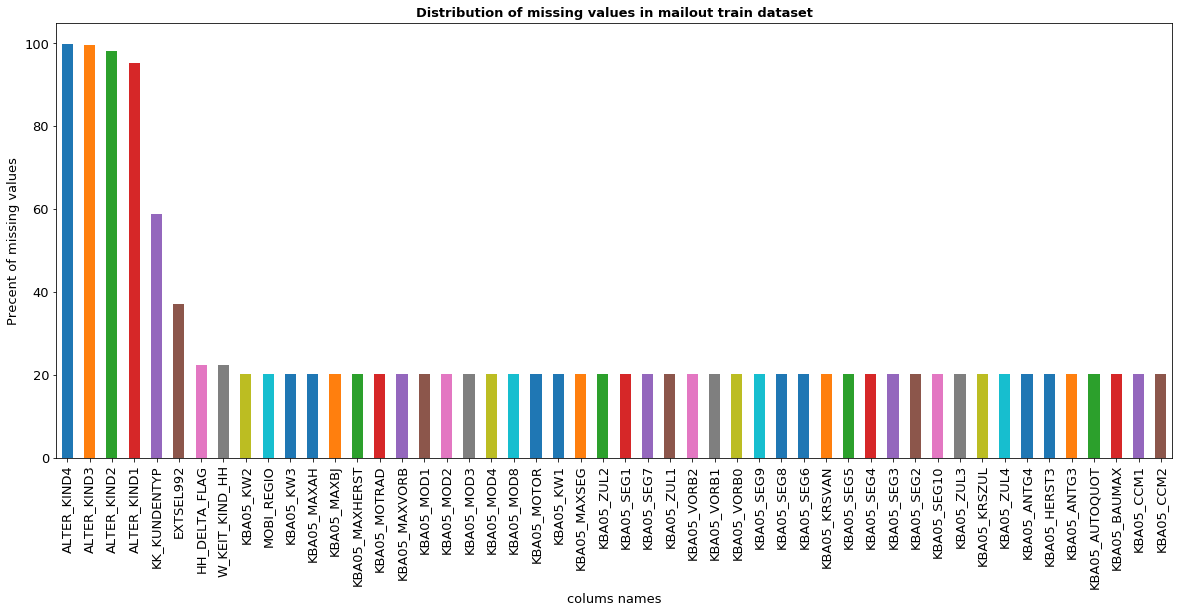

In [5]:
plt.title("Distribution of missing values in mailout train dataset",fontsize=13,fontweight="bold")
plt.xlabel("colums names",fontsize=13)
plt.ylabel("Precent of missing values",fontsize=13)
(col_nul_percent.sort_values(ascending=False)[:50].plot(kind='bar', figsize=(20,8), fontsize=13));

In [6]:
# Apply Data Cleaning to the dataset
# Note: clean_data is different from clean_data_ML
df_train=clean_data_ML(mailout_train)

Drop columns with more than 20% of missing values and Droping unnecessary columns
droping column EINGEFUEGT_AM and D19_LETZTER_KAUF_BRANCHE because it contain too many different items
creating a copy of dataframe
Re-encode OST_WEST_KZ attribute
Feature engineering WOHLANG
Droping WOHLANG column
Feature extracting CAMEO_DEUG_2015
remove columns with start with kba
Imputing Nan values
Counting Nan values 0


In [7]:
df_train.head()

,LNR,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,VHA,VHN,VK_DHT4A,VK_DISTANZ,W_KEIT_KIND_HH,WOHNDAUER_2008,ZABEOTYP,RESPONSE,ALTERSKATEGORIE_GROB,TYPE_QUALITY_NEIGHBOURHOOD
0,1763.0,1.0,8.0,15.0,0.0,0.0,1.0,13.0,0.0,3.0,...,1.0,2.0,5.0,2.0,6.0,9.0,3.0,0.0,4.0,2.0
1,1771.0,4.0,13.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,...,1.0,3.0,1.0,2.0,4.0,9.0,1.0,0.0,3.0,1.0
2,1776.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,4.0,1.0,6.0,4.0,6.0,9.0,3.0,0.0,4.0,0.0
3,1460.0,1.0,6.0,4.0,0.0,0.0,2.0,4.0,0.0,4.0,...,1.0,4.0,8.0,11.0,6.0,9.0,3.0,0.0,4.0,0.0
4,1783.0,1.0,9.0,53.0,0.0,0.0,1.0,44.0,0.0,3.0,...,0.0,4.0,2.0,2.0,6.0,9.0,3.0,0.0,3.0,2.0


In [8]:
#assigning X and y 
all_X = df_train.drop('RESPONSE',axis=1)
all_y = df_train['RESPONSE']

In [9]:
# Split the dataset into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, test_size=0.2, random_state=42)

### ML Algorithms:-

This is a **binary classification problem**. 

So, here I have use **Gradient Boosting** and **Adaboost** Algorithm to predict whether a person became a customer of the company's campaign or not.   

### Metrics:-
The evaluation metric for this particular problem is **AUC** for the **ROC curve**, 
relative to the detection of customers from the mail campaign.


**A ROC**, or receiver operating characteristic, 
is a graphic used to plot the true positive rate (TPR, proportion of actual customers that are labeled as so)
against the false positive rate (FPR, proportion of non-customers labeled as customers).

### GradientBoost

In [10]:
clf = GradientBoostingClassifier()
clf.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

### Model parameter selection:-
    Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions. 
   
    So, I have choose which paramaters are best and after that Tune that parametrs into ML Model.

In [9]:
param_grid = {'learning_rate': [.001,0.1],
              'max_depth': [5,4]
             }

grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs = -1,verbose=2)

In [10]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] learning_rate=0.001, max_depth=5 ................................
[CV] ................. learning_rate=0.001, max_depth=5, total= 1.2min
[CV] learning_rate=0.001, max_depth=5 ................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] ................. learning_rate=0.001, max_depth=5, total= 1.2min
[CV] learning_rate=0.001, max_depth=5 ................................
[CV] ................. learning_rate=0.001, max_depth=5, total= 1.4min
[CV] learning_rate=0.001, max_depth=5 ................................
[CV] ................. learning_rate=0.001, max_depth=5, total= 1.2min
[CV] learning_rate=0.001, max_depth=5 ................................
[CV] ................. learning_rate=0.001, max_depth=5, total= 1.3min
[CV] learning_rate=0.001, max_depth=4 ................................
[CV] ................. learning_rate=0.001, max_depth=4, total=  53.9s
[CV] learning_rate=0.001, max_depth=4 ................................
[CV] ................. learning_rate=0.001, max_depth=4, total=  52.9s
[CV] learning_rate=0.001, max_depth=4 ................................
[CV] ................. learning_rate=0.001, max_depth=4, total=  55.9s
[CV] learning_rate=0.001, max_depth=4 ................................
[CV] .

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 19.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.001, 0.1], 'max_depth': [5, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [11]:
print(grid.best_score_)
print(grid.best_estimator_)

0.759657593482
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [12]:
grid.best_params_

{'learning_rate': 0.001, 'max_depth': 4}

### Tuning best parameters into the  GradientBoosting model

In [11]:
clf_GBC = GradientBoostingClassifier(learning_rate=0.001,max_depth=4)

In [12]:
clf_GBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [13]:
#predict the test data
pred_GBC=clf_GBC.predict(X_test)

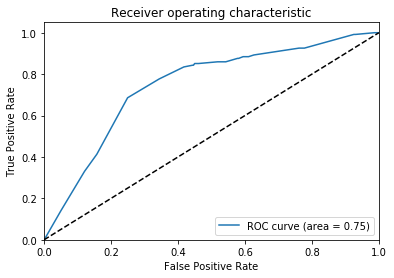

In [14]:
# evaluate the model
evaluate_model(clf_GBC, X_test, y_test)

In [15]:
#check accuracy score
accuracy_score(y_test,pred_GBC)

0.98591877109274995

In [16]:
print(confusion_matrix(y_test,pred_GBC))

[[8472    0]
 [ 121    0]]


In [17]:
print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, pred_GBC)))

ROC score on testing data: 0.5000


### AdaBoost

In [18]:
model = AdaBoostClassifier(DecisionTreeClassifier())

In [19]:
model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [20]:
param_grid = {'learning_rate': [0.1,0.2],
              'n_estimators':[50],
              'random_state': [42],
              'base_estimator__max_depth': [1, 3],
              'base_estimator__max_features': [20, None]}

In [21]:
ada = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs = -1,verbose=1)
ada_result =  ada.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.6min finished


In [22]:
print(ada.best_score_)
print(ada.best_estimator_)

0.762585670049
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=50, random_state=42)


### Tuning best parameters into the AdaBoost model

In [23]:
clf_ABC=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,max_features=None),learning_rate=0.1, n_estimators=50)

In [24]:
clf_ABC.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=50, random_state=None)

In [25]:
#predict the test data
pred_ABC=clf_ABC.predict(X_test)

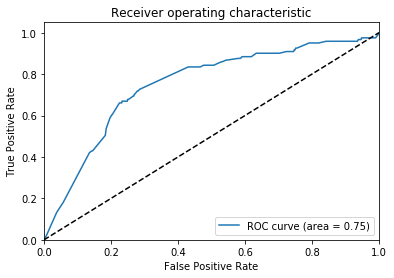

In [26]:
# evaluate the model and save it 
evaluate_model(clf_ABC, X_test, y_test)

In [27]:
#check accuracy score
accuracy_score(y_test,pred_ABC)

0.98591877109274995

In [28]:
print(confusion_matrix(y_test,pred_ABC))

[[8472    0]
 [ 121    0]]


In [29]:
print("ROC score on testing data: {:.4f}".format(roc_auc_score(y_test, pred_ABC)))

ROC score on testing data: 0.5000


## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [30]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
mailout_test.shape

(42833, 366)

In [32]:
#cleaning the test data
df_test=clean_data_ML(mailout_test)

Drop columns with more than 20% of missing values and Droping unnecessary columns
droping column EINGEFUEGT_AM and D19_LETZTER_KAUF_BRANCHE because it contain too many different items
creating a copy of dataframe
Re-encode OST_WEST_KZ attribute
Feature engineering WOHLANG
Droping WOHLANG column
Feature extracting CAMEO_DEUG_2015
remove columns with start with kba
Imputing Nan values
Counting Nan values 0


In [33]:
df_test.head()

,LNR,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,VERDICHTUNGSRAUM,VHA,VHN,VK_DHT4A,VK_DISTANZ,W_KEIT_KIND_HH,WOHNDAUER_2008,ZABEOTYP,ALTERSKATEGORIE_GROB,TYPE_QUALITY_NEIGHBOURHOOD
0,1754.0,1.0,6.0,2.0,0.0,0.0,2.0,2.0,0.0,3.0,...,23.0,1.0,4.0,5.0,6.0,6.0,9.0,3.0,4.0,2.0
1,1770.0,1.0,0.0,20.0,0.0,0.0,1.0,21.0,0.0,4.0,...,0.0,1.0,1.0,5.0,2.0,6.0,9.0,3.0,4.0,0.0
2,1465.0,9.0,11.0,2.0,0.0,0.0,4.0,2.0,0.0,4.0,...,15.0,1.0,3.0,9.0,6.0,2.0,9.0,3.0,4.0,2.0
3,1470.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,...,10.0,1.0,2.0,6.0,6.0,6.0,9.0,3.0,4.0,0.0
4,1478.0,1.0,13.0,1.0,0.0,0.0,4.0,1.0,0.0,3.0,...,0.0,1.0,1.0,2.0,4.0,3.0,9.0,4.0,4.0,1.0


In [34]:
#droping the ID column 
all_X= all_X.drop('LNR',axis=1)

In [35]:
colums=all_X.columns.tolist()

### Testing the data using GradientBoosting model

In [36]:
clf_GBC.fit(all_X,all_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [37]:
test_predictions_GBC= clf_GBC.predict(df_test[colums])

In [38]:
tst_pred_GBC=clf_GBC.predict_proba(df_test[colums])

In [39]:
tst_pred_GBC[:,1]

array([ 0.01433385,  0.01392055,  0.01146293, ...,  0.01392055,
        0.01433385,  0.01392055])

In [40]:
df_test_ids = df_test["LNR"].astype('Int32')
submission_df = {"LNR": df_test_ids,
                 "RESPONSE": tst_pred_GBC[:,1]}
submission = pd.DataFrame(submission_df)
submission.head(5)

,LNR,RESPONSE
0,1754,0.014334
1,1770,0.013921
2,1465,0.011463
3,1470,0.011463
4,1478,0.011463


### Testing the data using AdaBoost model

In [41]:
clf_ABC.fit(all_X,all_y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=50, random_state=None)

In [42]:
test_predictions= clf_ABC.predict(df_test[colums])

In [43]:
tst_pred_ABC=clf_ABC.predict_proba(df_test[colums])

In [44]:
tst_pred_ABC[:,1]

array([ 0.32530063,  0.33008197,  0.24436548, ...,  0.32827122,
        0.30867198,  0.32041832])

In [45]:
df_test_ids = df_test["LNR"].astype('Int32')
submission_df = {"LNR": df_test_ids,
                 "RESPONSE": tst_pred_ABC[:,1]}
submission = pd.DataFrame(submission_df)
submission.head(5)

,LNR,RESPONSE
0,1754,0.325301
1,1770,0.330082
2,1465,0.244365
3,1470,0.241881
4,1478,0.259735


### Final Submission:-

#### Why choose Adaboost Classifer ?

Both Adaboost and GradientBoosting algorithm follow the same fundamental idea,
both algorithms boost the performance using weak learners.
But, Ada Boost algorithm uses up-weights for misclassify a data point. 

For this classification problem,
after evaluating both the Models based on **roc_curve metrics**, **Adaboost** is the **best Classifer** to predict probalility of whether or not person become a customer of the campaign.
So, I have choose Adaboost Classifer and submitted its predictions to the kaggle. 

In [46]:
submission.to_csv('submission.csv', index=False) 

In [47]:
print("Score of Kaggle Competition using AdaBoosting is: 0.79336")

Score of Kaggle Competition using AdaBoosting is: 0.79336


### Analysis:-

Analaysis of AdaBoost Model's important features

In [48]:
feat_importance=clf_ABC.feature_importances_

In [49]:
num_feat = 6

indices = np.argsort(feat_importance)[::-1]
columns = X_train.columns.values[indices[:num_feat]]
values = feat_importance[indices][:num_feat]

In [50]:
print(columns)
print(values)

['D19_SONSTIGE' 'D19_KINDERARTIKEL' 'CAMEO_DEUG_2015' 'FINANZ_MINIMALIST'
 'D19_BANKEN_GROSS' 'FINANZ_UNAUFFAELLIGER']
[ 0.72  0.14  0.06  0.04  0.02  0.02]


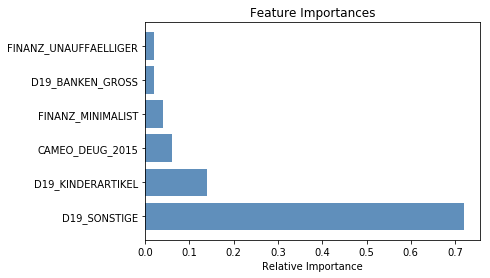

In [51]:
plt.title('Feature Importances')
plt.barh(np.arange(num_feat), values, color='#608fbb', align='center', label = "Feature Weight")
plt.yticks(np.arange(num_feat), columns)
plt.xlabel('Relative Importance')
plt.show()

## Conclusion:-

#### Reflection:-

- For this particluar project, the most excting part is to compare both the general population and customers dataset and try to idendtify which characteristics(features) are most important for becoming a customer of this campaign. 
- Most difficult part is improve your accuaracy(ROC) by doing some preprocseeing and feature engineering steps and dealing with lots of NaN data points. 

#### Improvments:-

- In this project, In the data preprocessing and cleaning section firstly I have used filling NaN values with 0. Unfortunately, I didn't get that much results and I got kaggle score 0.78009.
  So, I have applied SimpleImputer method, there are many method available like mean ,median and most_frequent.
- I use imputing NaN values with **most_frequent** method. I have improved my score, got 0.79336.